Fill in the missing code (#####) to use a NN to define an SVM classifier (see links at bottom of the file). Check for questions at the bottom of the file.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


In [3]:
num_features = 20
# generate regression dataset
X, y = make_regression(n_samples=4000, n_features=num_features, noise=0.1, random_state=1)

# split into train and test
n_train = 2000
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# reshape 1d arrays to 2d arrays
trainy = trainy.reshape(len(trainy), 1)
testy = testy.reshape(len(trainy), 1)

# create scaler
scaler = StandardScaler()
# fit scaler on training dataset
scaler.fit(trainy)
# transform training dataset
trainy = scaler.transform(trainy)
# transform test dataset
testy = scaler.transform(testy)

# fit scaler on training dataset
scaler.fit(trainX)
# transform training dataset
trainX = scaler.transform(trainX)
# transform test dataset
testX = scaler.transform(testX)

In [4]:
df = pd.DataFrame(trainy, columns=['y'])
df['lab']=np.where(df.y.shift(-1)>df.y,1,0) #like price prediction
trainy=df.lab.fillna(0).values
df = pd.DataFrame(testy, columns=['y'])
df['lab']=np.where(df.y.shift(-1)>df.y,1,0) #like price prediction
testy=df.lab.fillna(0).values

In [7]:
# Using the link (#1) at the bottom, program the SVM classifier with scaled inputs outputs on the regression problem.
#Note that once you wrap the neural net with the scikit-learn KerasClassifier wrapper,
#you can use scikit-learn's parameter search to optimize the neural net parameters. 
#Here the grid search chooses the best optimizer. For more info, see link (#2) at the bottom.

def create_model(optimizer='Adam'):
    # define model 
    model = Sequential()
    model.add(Dense(input_dim=20, units=64, activation='relu'))
    model.add(Dense(units=1, activation='linear', kernel_regularizer=keras.regularizers.l2(l=0.01)))
    #compile the model
    model.compile(loss='hinge', optimizer=optimizer, metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=1)

# define the grid search hyper parameter options and dictionary
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)

#create the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=None, cv=3)
grid_result = grid.fit(trainX, trainy)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Epoch 1/100
1333/1333 [==============================] - 1s 857us/step - loss: 0.8404 - acc: 0.4561
Epoch 2/100
1333/1333 [==============================] - 0s 53us/step - loss: 0.5754 - acc: 0.3961
Epoch 3/100
1333/1333 [==============================] - 0s 54us/step - loss: 0.5364 - acc: 0.2836
Epoch 4/100
1333/1333 [==============================] - 0s 53us/step - loss: 0.5285 - acc: 0.2348
Epoch 5/100
1333/1333 [==============================] - 0s 53us/step - loss: 0.5256 - acc: 0.2071
Epoch 6/100
1333/1333 [==============================] - 0s 52us/step - loss: 0.5240 - acc: 0.1823
Epoch 7/100
1333/1333 [==============================] - 0s 53us/step - loss: 0.5230 - acc: 0.1695
Epoch 8/100
1333/1333 [==============================] - 0s 52us/step - loss: 0.5223 - acc: 0.1643
Epoch 9/100
1333/1333 [==============================] - 0s 56us/step - loss: 0.5218 - acc: 0.1620
Epoch 10/100
1333/1333 [==============================] - 0s 55us/step - loss: 0.5213 - acc: 0.1560
Epoch 11

1333/1333 [==============================] - 0s 52us/step - loss: 0.5079 - acc: 0.3121
Epoch 84/100
1333/1333 [==============================] - 0s 52us/step - loss: 0.5079 - acc: 0.3166
Epoch 85/100
1333/1333 [==============================] - 0s 52us/step - loss: 0.5078 - acc: 0.3173
Epoch 86/100
1333/1333 [==============================] - 0s 53us/step - loss: 0.5077 - acc: 0.3181
Epoch 87/100
1333/1333 [==============================] - 0s 53us/step - loss: 0.5076 - acc: 0.3218
Epoch 88/100
1333/1333 [==============================] - 0s 52us/step - loss: 0.5075 - acc: 0.3241
Epoch 89/100
1333/1333 [==============================] - 0s 53us/step - loss: 0.5074 - acc: 0.3278
Epoch 90/100
1333/1333 [==============================] - 0s 53us/step - loss: 0.5074 - acc: 0.3293
Epoch 91/100
1333/1333 [==============================] - 0s 55us/step - loss: 0.5073 - acc: 0.3323
Epoch 92/100
1333/1333 [==============================] - 0s 53us/step - loss: 0.5072 - acc: 0.3353
Epoch 93/100


1333/1333 [==============================] - 0s 59us/step - loss: 0.5149 - acc: 0.1988
Epoch 65/100
1333/1333 [==============================] - 0s 53us/step - loss: 0.5148 - acc: 0.2026
Epoch 66/100
1333/1333 [==============================] - 0s 53us/step - loss: 0.5147 - acc: 0.2026
Epoch 67/100
1333/1333 [==============================] - 0s 55us/step - loss: 0.5145 - acc: 0.2041
Epoch 68/100
1333/1333 [==============================] - 0s 52us/step - loss: 0.5144 - acc: 0.2086
Epoch 69/100
1333/1333 [==============================] - 0s 55us/step - loss: 0.5143 - acc: 0.2138
Epoch 70/100
1333/1333 [==============================] - 0s 55us/step - loss: 0.5141 - acc: 0.2183
Epoch 71/100
1333/1333 [==============================] - 0s 52us/step - loss: 0.5140 - acc: 0.2198
Epoch 72/100
1333/1333 [==============================] - 0s 53us/step - loss: 0.5139 - acc: 0.2206
Epoch 73/100
1333/1333 [==============================] - 0s 54us/step - loss: 0.5138 - acc: 0.2236
Epoch 74/100


1334/1334 [==============================] - 0s 53us/step - loss: 0.5057 - acc: 0.2016
Epoch 46/100
1334/1334 [==============================] - 0s 53us/step - loss: 0.5055 - acc: 0.2031
Epoch 47/100
1334/1334 [==============================] - 0s 54us/step - loss: 0.5054 - acc: 0.2039
Epoch 48/100
1334/1334 [==============================] - 0s 54us/step - loss: 0.5052 - acc: 0.2069
Epoch 49/100
1334/1334 [==============================] - 0s 55us/step - loss: 0.5050 - acc: 0.2076
Epoch 50/100
1334/1334 [==============================] - 0s 54us/step - loss: 0.5048 - acc: 0.2106
Epoch 51/100
1334/1334 [==============================] - 0s 53us/step - loss: 0.5047 - acc: 0.2121
Epoch 52/100
1334/1334 [==============================] - 0s 60us/step - loss: 0.5045 - acc: 0.2159
Epoch 53/100
1334/1334 [==============================] - 0s 59us/step - loss: 0.5044 - acc: 0.2174
Epoch 54/100
1334/1334 [==============================] - 0s 57us/step - loss: 0.5042 - acc: 0.2196
Epoch 55/100


1333/1333 [==============================] - 0s 63us/step - loss: 0.5026 - acc: 0.4831
Epoch 27/100
1333/1333 [==============================] - 0s 58us/step - loss: 0.5025 - acc: 0.4816
Epoch 28/100
1333/1333 [==============================] - 0s 58us/step - loss: 0.5025 - acc: 0.4861
Epoch 29/100
1333/1333 [==============================] - 0s 63us/step - loss: 0.5025 - acc: 0.4906
Epoch 30/100
1333/1333 [==============================] - 0s 63us/step - loss: 0.5024 - acc: 0.4929
Epoch 31/100
1333/1333 [==============================] - 0s 59us/step - loss: 0.5024 - acc: 0.4914
Epoch 32/100
1333/1333 [==============================] - 0s 60us/step - loss: 0.5023 - acc: 0.4921
Epoch 33/100
1333/1333 [==============================] - 0s 65us/step - loss: 0.5023 - acc: 0.4936
Epoch 34/100
1333/1333 [==============================] - 0s 65us/step - loss: 0.5023 - acc: 0.4944
Epoch 35/100
1333/1333 [==============================] - 0s 60us/step - loss: 0.5023 - acc: 0.4914
Epoch 36/100


1333/1333 [==============================] - 0s 59us/step - loss: 0.5113 - acc: 0.2993
Epoch 8/100
1333/1333 [==============================] - 0s 60us/step - loss: 0.5100 - acc: 0.3218
Epoch 9/100
1333/1333 [==============================] - 0s 57us/step - loss: 0.5093 - acc: 0.3391
Epoch 10/100
1333/1333 [==============================] - 0s 60us/step - loss: 0.5087 - acc: 0.3691
Epoch 11/100
1333/1333 [==============================] - 0s 61us/step - loss: 0.5083 - acc: 0.3803
Epoch 12/100
1333/1333 [==============================] - 0s 61us/step - loss: 0.5079 - acc: 0.4044
Epoch 13/100
1333/1333 [==============================] - 0s 58us/step - loss: 0.5077 - acc: 0.3968
Epoch 14/100
1333/1333 [==============================] - 0s 63us/step - loss: 0.5075 - acc: 0.4156
Epoch 15/100
1333/1333 [==============================] - 0s 58us/step - loss: 0.5073 - acc: 0.4299
Epoch 16/100
1333/1333 [==============================] - 0s 57us/step - loss: 0.5071 - acc: 0.4359
Epoch 17/100
13

1333/1333 [==============================] - 0s 59us/step - loss: 0.5057 - acc: 0.4944
Epoch 90/100
1333/1333 [==============================] - 0s 57us/step - loss: 0.5057 - acc: 0.4944
Epoch 91/100
1333/1333 [==============================] - 0s 57us/step - loss: 0.5057 - acc: 0.4944
Epoch 92/100
1333/1333 [==============================] - 0s 59us/step - loss: 0.5057 - acc: 0.4944
Epoch 93/100
1333/1333 [==============================] - 0s 58us/step - loss: 0.5057 - acc: 0.4944
Epoch 94/100
1333/1333 [==============================] - 0s 60us/step - loss: 0.5057 - acc: 0.4944
Epoch 95/100
1333/1333 [==============================] - 0s 61us/step - loss: 0.5057 - acc: 0.4944
Epoch 96/100
1333/1333 [==============================] - 0s 62us/step - loss: 0.5057 - acc: 0.4944
Epoch 97/100
1333/1333 [==============================] - 0s 61us/step - loss: 0.5057 - acc: 0.4944
Epoch 98/100
1333/1333 [==============================] - 0s 58us/step - loss: 0.5057 - acc: 0.4944
Epoch 99/100


1334/1334 [==============================] - 0s 57us/step - loss: 0.4941 - acc: 0.5060
Epoch 71/100
1334/1334 [==============================] - 0s 56us/step - loss: 0.4941 - acc: 0.5060
Epoch 72/100
1334/1334 [==============================] - 0s 59us/step - loss: 0.4941 - acc: 0.5060
Epoch 73/100
1334/1334 [==============================] - 0s 57us/step - loss: 0.4941 - acc: 0.5060
Epoch 74/100
1334/1334 [==============================] - 0s 56us/step - loss: 0.4941 - acc: 0.5060
Epoch 75/100
1334/1334 [==============================] - 0s 57us/step - loss: 0.4941 - acc: 0.5060
Epoch 76/100
1334/1334 [==============================] - 0s 59us/step - loss: 0.4941 - acc: 0.5060
Epoch 77/100
1334/1334 [==============================] - 0s 66us/step - loss: 0.4941 - acc: 0.5060
Epoch 78/100
1334/1334 [==============================] - 0s 67us/step - loss: 0.4941 - acc: 0.5060
Epoch 79/100
1334/1334 [==============================] - 0s 61us/step - loss: 0.4941 - acc: 0.5060
Epoch 80/100


1333/1333 [==============================] - 0s 67us/step - loss: 0.5051 - acc: 0.3893
Epoch 52/100
1333/1333 [==============================] - 0s 65us/step - loss: 0.5050 - acc: 0.3901
Epoch 53/100
1333/1333 [==============================] - 0s 59us/step - loss: 0.5049 - acc: 0.3893
Epoch 54/100
1333/1333 [==============================] - 0s 58us/step - loss: 0.5049 - acc: 0.3923
Epoch 55/100
1333/1333 [==============================] - 0s 58us/step - loss: 0.5048 - acc: 0.3938
Epoch 56/100
1333/1333 [==============================] - 0s 56us/step - loss: 0.5048 - acc: 0.3938
Epoch 57/100
1333/1333 [==============================] - 0s 59us/step - loss: 0.5047 - acc: 0.3931
Epoch 58/100
1333/1333 [==============================] - 0s 56us/step - loss: 0.5046 - acc: 0.3998
Epoch 59/100
1333/1333 [==============================] - 0s 59us/step - loss: 0.5046 - acc: 0.4006
Epoch 60/100
1333/1333 [==============================] - 0s 57us/step - loss: 0.5045 - acc: 0.3976
Epoch 61/100


1333/1333 [==============================] - 0s 58us/step - loss: 0.5128 - acc: 0.3398
Epoch 33/100
1333/1333 [==============================] - 0s 54us/step - loss: 0.5126 - acc: 0.3428
Epoch 34/100
1333/1333 [==============================] - 0s 57us/step - loss: 0.5124 - acc: 0.3481
Epoch 35/100
1333/1333 [==============================] - 0s 55us/step - loss: 0.5122 - acc: 0.3511
Epoch 36/100
1333/1333 [==============================] - 0s 55us/step - loss: 0.5120 - acc: 0.3541
Epoch 37/100
1333/1333 [==============================] - 0s 55us/step - loss: 0.5118 - acc: 0.3563
Epoch 38/100
1333/1333 [==============================] - 0s 55us/step - loss: 0.5117 - acc: 0.3563
Epoch 39/100
1333/1333 [==============================] - 0s 60us/step - loss: 0.5115 - acc: 0.3616
Epoch 40/100
1333/1333 [==============================] - 0s 58us/step - loss: 0.5114 - acc: 0.3601
Epoch 41/100
1333/1333 [==============================] - 0s 58us/step - loss: 0.5112 - acc: 0.3661
Epoch 42/100


1334/1334 [==============================] - 0s 61us/step - loss: 0.5043 - acc: 0.2099
Epoch 14/100
1334/1334 [==============================] - 0s 59us/step - loss: 0.5039 - acc: 0.2144
Epoch 15/100
1334/1334 [==============================] - 0s 58us/step - loss: 0.5034 - acc: 0.2211
Epoch 16/100
1334/1334 [==============================] - 0s 59us/step - loss: 0.5030 - acc: 0.2346
Epoch 17/100
1334/1334 [==============================] - 0s 58us/step - loss: 0.5026 - acc: 0.2361
Epoch 18/100
1334/1334 [==============================] - 0s 57us/step - loss: 0.5022 - acc: 0.2481
Epoch 19/100
1334/1334 [==============================] - 0s 58us/step - loss: 0.5018 - acc: 0.2541
Epoch 20/100
1334/1334 [==============================] - 0s 58us/step - loss: 0.5015 - acc: 0.2601
Epoch 21/100
1334/1334 [==============================] - 0s 60us/step - loss: 0.5012 - acc: 0.2676
Epoch 22/100
1334/1334 [==============================] - 0s 59us/step - loss: 0.5009 - acc: 0.2789
Epoch 23/100


1334/1334 [==============================] - 0s 57us/step - loss: 0.4955 - acc: 0.4468
Epoch 96/100
1334/1334 [==============================] - 0s 57us/step - loss: 0.4955 - acc: 0.4460
Epoch 97/100
1334/1334 [==============================] - 0s 57us/step - loss: 0.4955 - acc: 0.4490
Epoch 98/100
1334/1334 [==============================] - 0s 59us/step - loss: 0.4955 - acc: 0.4490
Epoch 99/100
1334/1334 [==============================] - 0s 58us/step - loss: 0.4955 - acc: 0.4490
Epoch 100/100
666/666 [==============================] - 0s 138us/step
Epoch 1/100
1333/1333 [==============================] - 0s 271us/step - loss: 0.8136 - acc: 0.4786
Epoch 2/100
1333/1333 [==============================] - 0s 68us/step - loss: 0.5478 - acc: 0.3481
Epoch 3/100
1333/1333 [==============================] - 0s 68us/step - loss: 0.5262 - acc: 0.2063
Epoch 4/100
1333/1333 [==============================] - 0s 69us/step - loss: 0.5219 - acc: 0.1523
Epoch 5/100
1333/1333 [======================

1333/1333 [==============================] - 0s 74us/step - loss: 0.5023 - acc: 0.4951
Epoch 77/100
1333/1333 [==============================] - 0s 58us/step - loss: 0.5023 - acc: 0.4959
Epoch 78/100
1333/1333 [==============================] - 0s 70us/step - loss: 0.5023 - acc: 0.4959
Epoch 79/100
1333/1333 [==============================] - 0s 65us/step - loss: 0.5023 - acc: 0.4966
Epoch 80/100
1333/1333 [==============================] - 0s 68us/step - loss: 0.5022 - acc: 0.4974
Epoch 81/100
1333/1333 [==============================] - 0s 60us/step - loss: 0.5022 - acc: 0.4966
Epoch 82/100
1333/1333 [==============================] - 0s 68us/step - loss: 0.5022 - acc: 0.4974
Epoch 83/100
1333/1333 [==============================] - 0s 67us/step - loss: 0.5022 - acc: 0.4974
Epoch 84/100
1333/1333 [==============================] - 0s 63us/step - loss: 0.5022 - acc: 0.4981
Epoch 85/100
1333/1333 [==============================] - 0s 63us/step - loss: 0.5022 - acc: 0.4981
Epoch 86/100


1333/1333 [==============================] - 0s 59us/step - loss: 0.5063 - acc: 0.4891
Epoch 58/100
1333/1333 [==============================] - 0s 73us/step - loss: 0.5062 - acc: 0.4891
Epoch 59/100
1333/1333 [==============================] - 0s 68us/step - loss: 0.5062 - acc: 0.4884
Epoch 60/100
1333/1333 [==============================] - 0s 68us/step - loss: 0.5062 - acc: 0.4914
Epoch 61/100
1333/1333 [==============================] - 0s 62us/step - loss: 0.5062 - acc: 0.4914
Epoch 62/100
1333/1333 [==============================] - 0s 61us/step - loss: 0.5062 - acc: 0.4906
Epoch 63/100
1333/1333 [==============================] - 0s 63us/step - loss: 0.5062 - acc: 0.4906
Epoch 64/100
1333/1333 [==============================] - 0s 63us/step - loss: 0.5062 - acc: 0.4914
Epoch 65/100
1333/1333 [==============================] - 0s 63us/step - loss: 0.5062 - acc: 0.4921
Epoch 66/100
1333/1333 [==============================] - 0s 57us/step - loss: 0.5061 - acc: 0.4914
Epoch 67/100


1334/1334 [==============================] - 0s 68us/step - loss: 0.4951 - acc: 0.4813
Epoch 39/100
1334/1334 [==============================] - 0s 63us/step - loss: 0.4951 - acc: 0.4820
Epoch 40/100
1334/1334 [==============================] - 0s 70us/step - loss: 0.4951 - acc: 0.4820
Epoch 41/100
1334/1334 [==============================] - 0s 60us/step - loss: 0.4950 - acc: 0.4858
Epoch 42/100
1334/1334 [==============================] - 0s 63us/step - loss: 0.4950 - acc: 0.4828
Epoch 43/100
1334/1334 [==============================] - 0s 68us/step - loss: 0.4950 - acc: 0.4865
Epoch 44/100
1334/1334 [==============================] - 0s 68us/step - loss: 0.4950 - acc: 0.4895
Epoch 45/100
1334/1334 [==============================] - 0s 70us/step - loss: 0.4949 - acc: 0.4903
Epoch 46/100
1334/1334 [==============================] - 0s 59us/step - loss: 0.4949 - acc: 0.4918
Epoch 47/100
1334/1334 [==============================] - 0s 68us/step - loss: 0.4949 - acc: 0.4910
Epoch 48/100


1333/1333 [==============================] - 0s 64us/step - loss: 0.5144 - acc: 0.1590
Epoch 20/100
1333/1333 [==============================] - 0s 68us/step - loss: 0.5138 - acc: 0.1710
Epoch 21/100
1333/1333 [==============================] - 0s 68us/step - loss: 0.5131 - acc: 0.1778
Epoch 22/100
1333/1333 [==============================] - 0s 80us/step - loss: 0.5125 - acc: 0.1898
Epoch 23/100
1333/1333 [==============================] - 0s 61us/step - loss: 0.5118 - acc: 0.2071
Epoch 24/100
1333/1333 [==============================] - 0s 84us/step - loss: 0.5113 - acc: 0.2153
Epoch 25/100
1333/1333 [==============================] - 0s 62us/step - loss: 0.5107 - acc: 0.2183
Epoch 26/100
1333/1333 [==============================] - 0s 73us/step - loss: 0.5101 - acc: 0.2333
Epoch 27/100
1333/1333 [==============================] - 0s 67us/step - loss: 0.5097 - acc: 0.2431
Epoch 28/100
1333/1333 [==============================] - 0s 63us/step - loss: 0.5092 - acc: 0.2498
Epoch 29/100


667/667 [==============================] - 0s 197us/step
Epoch 1/100
1333/1333 [==============================] - 0s 342us/step - loss: 0.8007 - acc: 0.4621
Epoch 2/100
1333/1333 [==============================] - 0s 68us/step - loss: 0.5437 - acc: 0.3181
Epoch 3/100
1333/1333 [==============================] - 0s 62us/step - loss: 0.5256 - acc: 0.1988
Epoch 4/100
1333/1333 [==============================] - 0s 64us/step - loss: 0.5240 - acc: 0.1755
Epoch 5/100
1333/1333 [==============================] - 0s 62us/step - loss: 0.5234 - acc: 0.1748
Epoch 6/100
1333/1333 [==============================] - 0s 63us/step - loss: 0.5228 - acc: 0.1748
Epoch 7/100
1333/1333 [==============================] - 0s 63us/step - loss: 0.5221 - acc: 0.1793
Epoch 8/100
1333/1333 [==============================] - 0s 63us/step - loss: 0.5215 - acc: 0.1868
Epoch 9/100
1333/1333 [==============================] - 0s 62us/step - loss: 0.5208 - acc: 0.2056
Epoch 10/100
1333/1333 [===========================

1333/1333 [==============================] - 0s 78us/step - loss: 0.5064 - acc: 0.4711
Epoch 83/100
1333/1333 [==============================] - 0s 63us/step - loss: 0.5064 - acc: 0.4734
Epoch 84/100
1333/1333 [==============================] - 0s 72us/step - loss: 0.5064 - acc: 0.4741
Epoch 85/100
1333/1333 [==============================] - 0s 68us/step - loss: 0.5063 - acc: 0.4771
Epoch 86/100
1333/1333 [==============================] - 0s 63us/step - loss: 0.5063 - acc: 0.4801
Epoch 87/100
1333/1333 [==============================] - 0s 78us/step - loss: 0.5063 - acc: 0.4756
Epoch 88/100
1333/1333 [==============================] - 0s 68us/step - loss: 0.5063 - acc: 0.4756
Epoch 89/100
1333/1333 [==============================] - 0s 67us/step - loss: 0.5063 - acc: 0.4779
Epoch 90/100
1333/1333 [==============================] - 0s 63us/step - loss: 0.5063 - acc: 0.4786
Epoch 91/100
1333/1333 [==============================] - 0s 78us/step - loss: 0.5063 - acc: 0.4756
Epoch 92/100


1334/1334 [==============================] - 0s 71us/step - loss: 0.4953 - acc: 0.4543
Epoch 64/100
1334/1334 [==============================] - 0s 58us/step - loss: 0.4953 - acc: 0.4618
Epoch 65/100
1334/1334 [==============================] - 0s 70us/step - loss: 0.4952 - acc: 0.4550
Epoch 66/100
1334/1334 [==============================] - 0s 62us/step - loss: 0.4952 - acc: 0.4610
Epoch 67/100
1334/1334 [==============================] - 0s 63us/step - loss: 0.4952 - acc: 0.4610
Epoch 68/100
1334/1334 [==============================] - 0s 63us/step - loss: 0.4951 - acc: 0.4595
Epoch 69/100
1334/1334 [==============================] - 0s 64us/step - loss: 0.4951 - acc: 0.4580
Epoch 70/100
1334/1334 [==============================] - 0s 63us/step - loss: 0.4951 - acc: 0.4678
Epoch 71/100
1334/1334 [==============================] - 0s 61us/step - loss: 0.4951 - acc: 0.4528
Epoch 72/100
1334/1334 [==============================] - 0s 58us/step - loss: 0.4950 - acc: 0.4633
Epoch 73/100


1333/1333 [==============================] - 0s 60us/step - loss: 0.5080 - acc: 0.2783
Epoch 45/100
1333/1333 [==============================] - 0s 60us/step - loss: 0.5076 - acc: 0.2798
Epoch 46/100
1333/1333 [==============================] - 0s 62us/step - loss: 0.5073 - acc: 0.2843
Epoch 47/100
1333/1333 [==============================] - 0s 65us/step - loss: 0.5070 - acc: 0.2978
Epoch 48/100
1333/1333 [==============================] - 0s 58us/step - loss: 0.5067 - acc: 0.3016
Epoch 49/100
1333/1333 [==============================] - 0s 64us/step - loss: 0.5064 - acc: 0.3098
Epoch 50/100
1333/1333 [==============================] - 0s 64us/step - loss: 0.5062 - acc: 0.3181
Epoch 51/100
1333/1333 [==============================] - 0s 62us/step - loss: 0.5059 - acc: 0.3256
Epoch 52/100
1333/1333 [==============================] - 0s 62us/step - loss: 0.5057 - acc: 0.3338
Epoch 53/100
1333/1333 [==============================] - 0s 66us/step - loss: 0.5055 - acc: 0.3451
Epoch 54/100


1333/1333 [==============================] - 0s 62us/step - loss: 0.5158 - acc: 0.2641
Epoch 26/100
1333/1333 [==============================] - 0s 60us/step - loss: 0.5153 - acc: 0.2731
Epoch 27/100
1333/1333 [==============================] - 0s 62us/step - loss: 0.5149 - acc: 0.2761
Epoch 28/100
1333/1333 [==============================] - 0s 61us/step - loss: 0.5145 - acc: 0.2806
Epoch 29/100
1333/1333 [==============================] - 0s 60us/step - loss: 0.5141 - acc: 0.2926
Epoch 30/100
1333/1333 [==============================] - 0s 62us/step - loss: 0.5137 - acc: 0.2963
Epoch 31/100
1333/1333 [==============================] - 0s 62us/step - loss: 0.5133 - acc: 0.2978
Epoch 32/100
1333/1333 [==============================] - 0s 58us/step - loss: 0.5129 - acc: 0.3076
Epoch 33/100
1333/1333 [==============================] - 0s 63us/step - loss: 0.5126 - acc: 0.3188
Epoch 34/100
1333/1333 [==============================] - 0s 60us/step - loss: 0.5122 - acc: 0.3233
Epoch 35/100


1334/1334 [==============================] - 0s 63us/step - loss: 0.5109 - acc: 0.1469
Epoch 7/100
1334/1334 [==============================] - 0s 61us/step - loss: 0.5105 - acc: 0.1439
Epoch 8/100
1334/1334 [==============================] - 0s 64us/step - loss: 0.5101 - acc: 0.1439
Epoch 9/100
1334/1334 [==============================] - 0s 61us/step - loss: 0.5097 - acc: 0.1469
Epoch 10/100
1334/1334 [==============================] - 0s 63us/step - loss: 0.5093 - acc: 0.1477
Epoch 11/100
1334/1334 [==============================] - 0s 62us/step - loss: 0.5089 - acc: 0.1514
Epoch 12/100
1334/1334 [==============================] - 0s 62us/step - loss: 0.5085 - acc: 0.1544
Epoch 13/100
1334/1334 [==============================] - 0s 67us/step - loss: 0.5081 - acc: 0.1634
Epoch 14/100
1334/1334 [==============================] - 0s 61us/step - loss: 0.5078 - acc: 0.1724
Epoch 15/100
1334/1334 [==============================] - 0s 62us/step - loss: 0.5074 - acc: 0.1739
Epoch 16/100
133

1334/1334 [==============================] - 0s 70us/step - loss: 0.4949 - acc: 0.4858
Epoch 89/100
1334/1334 [==============================] - 0s 60us/step - loss: 0.4949 - acc: 0.4865
Epoch 90/100
1334/1334 [==============================] - 0s 63us/step - loss: 0.4949 - acc: 0.4888
Epoch 91/100
1334/1334 [==============================] - 0s 63us/step - loss: 0.4949 - acc: 0.4895
Epoch 92/100
1334/1334 [==============================] - 0s 68us/step - loss: 0.4949 - acc: 0.4888
Epoch 93/100
1334/1334 [==============================] - 0s 63us/step - loss: 0.4949 - acc: 0.4918
Epoch 94/100
1334/1334 [==============================] - 0s 62us/step - loss: 0.4948 - acc: 0.4903
Epoch 95/100
1334/1334 [==============================] - 0s 62us/step - loss: 0.4948 - acc: 0.4918
Epoch 96/100
1334/1334 [==============================] - 0s 62us/step - loss: 0.4948 - acc: 0.4955
Epoch 97/100
1334/1334 [==============================] - 0s 65us/step - loss: 0.4948 - acc: 0.4940
Epoch 98/100


1333/1333 [==============================] - 0s 72us/step - loss: 0.5023 - acc: 0.4854
Epoch 70/100
1333/1333 [==============================] - 0s 67us/step - loss: 0.5023 - acc: 0.4839
Epoch 71/100
1333/1333 [==============================] - 0s 78us/step - loss: 0.5023 - acc: 0.4674
Epoch 72/100
1333/1333 [==============================] - 0s 63us/step - loss: 0.5023 - acc: 0.4854
Epoch 73/100
1333/1333 [==============================] - 0s 78us/step - loss: 0.5023 - acc: 0.4861
Epoch 74/100
1333/1333 [==============================] - 0s 73us/step - loss: 0.5023 - acc: 0.4869
Epoch 75/100
1333/1333 [==============================] - 0s 62us/step - loss: 0.5023 - acc: 0.4824
Epoch 76/100
1333/1333 [==============================] - 0s 78us/step - loss: 0.5022 - acc: 0.4936
Epoch 77/100
1333/1333 [==============================] - 0s 68us/step - loss: 0.5023 - acc: 0.4861
Epoch 78/100
1333/1333 [==============================] - 0s 62us/step - loss: 0.5023 - acc: 0.4891
Epoch 79/100


1333/1333 [==============================] - 0s 78us/step - loss: 0.5064 - acc: 0.4501
Epoch 51/100
1333/1333 [==============================] - 0s 73us/step - loss: 0.5064 - acc: 0.4576
Epoch 52/100
1333/1333 [==============================] - 0s 68us/step - loss: 0.5063 - acc: 0.4704
Epoch 53/100
1333/1333 [==============================] - 0s 68us/step - loss: 0.5063 - acc: 0.4651
Epoch 54/100
1333/1333 [==============================] - 0s 63us/step - loss: 0.5063 - acc: 0.4764
Epoch 55/100
1333/1333 [==============================] - 0s 67us/step - loss: 0.5062 - acc: 0.4764
Epoch 56/100
1333/1333 [==============================] - 0s 78us/step - loss: 0.5062 - acc: 0.4786
Epoch 57/100
1333/1333 [==============================] - 0s 68us/step - loss: 0.5062 - acc: 0.4741
Epoch 58/100
1333/1333 [==============================] - 0s 58us/step - loss: 0.5062 - acc: 0.4614
Epoch 59/100
1333/1333 [==============================] - 0s 78us/step - loss: 0.5062 - acc: 0.4749
Epoch 60/100


1334/1334 [==============================] - 0s 74us/step - loss: 0.4956 - acc: 0.4018
Epoch 32/100
1334/1334 [==============================] - 0s 70us/step - loss: 0.4955 - acc: 0.4010
Epoch 33/100
1334/1334 [==============================] - 0s 68us/step - loss: 0.4954 - acc: 0.4078
Epoch 34/100
1334/1334 [==============================] - 0s 58us/step - loss: 0.4953 - acc: 0.4198
Epoch 35/100
1334/1334 [==============================] - 0s 67us/step - loss: 0.4953 - acc: 0.4205
Epoch 36/100
1334/1334 [==============================] - 0s 69us/step - loss: 0.4952 - acc: 0.4273
Epoch 37/100
1334/1334 [==============================] - 0s 73us/step - loss: 0.4952 - acc: 0.4325
Epoch 38/100
1334/1334 [==============================] - 0s 63us/step - loss: 0.4952 - acc: 0.4438
Epoch 39/100
1334/1334 [==============================] - 0s 73us/step - loss: 0.4951 - acc: 0.4303
Epoch 40/100
1334/1334 [==============================] - 0s 62us/step - loss: 0.4951 - acc: 0.4475
Epoch 41/100


2000/2000 [==============================] - 0s 63us/step - loss: 0.5017 - acc: 0.4525
Epoch 13/100
2000/2000 [==============================] - 0s 52us/step - loss: 0.5017 - acc: 0.4625
Epoch 14/100
2000/2000 [==============================] - 0s 68us/step - loss: 0.5015 - acc: 0.4685
Epoch 15/100
2000/2000 [==============================] - 0s 53us/step - loss: 0.5014 - acc: 0.4815
Epoch 16/100
2000/2000 [==============================] - 0s 63us/step - loss: 0.5013 - acc: 0.4815
Epoch 17/100
2000/2000 [==============================] - 0s 60us/step - loss: 0.5012 - acc: 0.4840
Epoch 18/100
2000/2000 [==============================] - 0s 60us/step - loss: 0.5012 - acc: 0.4890
Epoch 19/100
2000/2000 [==============================] - 0s 54us/step - loss: 0.5011 - acc: 0.4905
Epoch 20/100
2000/2000 [==============================] - 0s 59us/step - loss: 0.5011 - acc: 0.4945
Epoch 21/100
2000/2000 [==============================] - 0s 59us/step - loss: 0.5010 - acc: 0.4950
Epoch 22/100


2000/2000 [==============================] - 0s 59us/step - loss: 0.5005 - acc: 0.4995
Epoch 95/100
2000/2000 [==============================] - 0s 67us/step - loss: 0.5005 - acc: 0.4995
Epoch 96/100
2000/2000 [==============================] - 0s 62us/step - loss: 0.5005 - acc: 0.4995
Epoch 97/100
2000/2000 [==============================] - 0s 54us/step - loss: 0.5005 - acc: 0.4995
Epoch 98/100
2000/2000 [==============================] - 0s 60us/step - loss: 0.5005 - acc: 0.4995
Epoch 99/100
2000/2000 [==============================] - 0s 67us/step - loss: 0.5005 - acc: 0.4995
Epoch 100/100
2000/2000 [==============================] - 0s 59us/step - loss: 0.5005 - acc: 0.4995
Best: 0.499493 using {'optimizer': 'RMSprop'}
0.336491 (0.022916) with: {'optimizer': 'SGD'}
0.499493 (0.009693) with: {'optimizer': 'RMSprop'}
0.439499 (0.007565) with: {'optimizer': 'Adagrad'}
0.499493 (0.009693) with: {'optimizer': 'Adadelta'}
0.489493 (0.012837) with: {'optimizer': 'Adam'}
0.489491 (0.01388

Redefine the model using the best optimizer from above

Train on 2000 samples, validate on 2000 samples
Epoch 1/100
2000/2000 [==============================] - 1s 439us/step - loss: 0.6154 - acc: 0.3360 - val_loss: 0.5379 - val_acc: 0.1790
Epoch 2/100
2000/2000 [==============================] - 0s 86us/step - loss: 0.5251 - acc: 0.1310 - val_loss: 0.5273 - val_acc: 0.0980
Epoch 3/100
2000/2000 [==============================] - 0s 79us/step - loss: 0.5168 - acc: 0.1270 - val_loss: 0.5196 - val_acc: 0.1515
Epoch 4/100
2000/2000 [==============================] - 0s 84us/step - loss: 0.5105 - acc: 0.2030 - val_loss: 0.5149 - val_acc: 0.2530
Epoch 5/100
2000/2000 [==============================] - 0s 83us/step - loss: 0.5066 - acc: 0.2870 - val_loss: 0.5117 - val_acc: 0.2760
Epoch 6/100
2000/2000 [==============================] - 0s 91us/step - loss: 0.5046 - acc: 0.3270 - val_loss: 0.5103 - val_acc: 0.3460
Epoch 7/100
2000/2000 [==============================] - 0s 83us/step - loss: 0.5035 - acc: 0.3605 - val_loss: 0.5093 - val_acc: 0.3320

2000/2000 [==============================] - 0s 83us/step - loss: 0.5006 - acc: 0.4995 - val_loss: 0.5066 - val_acc: 0.4935
Epoch 61/100
2000/2000 [==============================] - 0s 84us/step - loss: 0.5006 - acc: 0.4995 - val_loss: 0.5065 - val_acc: 0.4935
Epoch 62/100
2000/2000 [==============================] - 0s 88us/step - loss: 0.5005 - acc: 0.4995 - val_loss: 0.5065 - val_acc: 0.4935
Epoch 63/100
2000/2000 [==============================] - 0s 79us/step - loss: 0.5006 - acc: 0.4995 - val_loss: 0.5065 - val_acc: 0.4935
Epoch 64/100
2000/2000 [==============================] - 0s 95us/step - loss: 0.5005 - acc: 0.4995 - val_loss: 0.5066 - val_acc: 0.4935
Epoch 65/100
2000/2000 [==============================] - 0s 89us/step - loss: 0.5005 - acc: 0.4995 - val_loss: 0.5065 - val_acc: 0.4935
Epoch 66/100
2000/2000 [==============================] - 0s 91us/step - loss: 0.5005 - acc: 0.4995 - val_loss: 0.5065 - val_acc: 0.4935
Epoch 67/100
2000/2000 [==============================

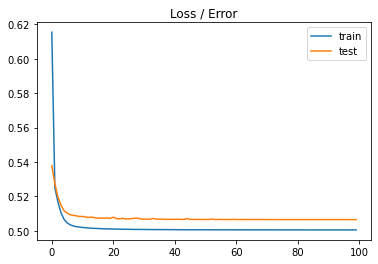

In [8]:
# define model
model = Sequential()
model.add(Dense(input_dim=20, units=64, activation='relu'))
model.add(Dense(units=1, activation='linear', kernel_regularizer=keras.regularizers.l2(l=0.01)))
#compile the model
model.compile(loss='hinge', optimizer=grid_result.best_params_['optimizer'], metrics=['accuracy'])
#fit the model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=1)
# evaluate the model
train_e = model.evaluate(trainX, trainy, verbose=1)
test_e = model.evaluate(testX, testy, verbose=1)
print('Train loss: %.3f, Test loss: %.3f' % (train_e[0], test_e[0])) 
print('Train metric: %.3f, Test metric: %.3f' % (train_e[1], test_e[1])) 
#plot loss during training
plt.title('Loss / Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

References:
1. https://archive.md/sanjs
2. https://archive.md/lOvhL

Can you program a simple tree with Keras Tensorflow?